<a href="https://colab.research.google.com/github/Ashishpathak78/ML_-Practice/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

x = np.array([1,2,3])
y = np.array([4,5,6])

euclidean= np.linalg.norm(x-y)
print(euclidean)

manhattan = np.sum(np.abs(x-y))
print(manhattan)

cosine = np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))
print(cosine)

A = set([1,2,3,4])
B = set([3,4,5,6])
jaccard = len(A.intersection(B))/len(A.union(B))
print(jaccard)

5.196152422706632
9
0.9746318461970762
0.3333333333333333


In [ ]:
import numpy as np
from scipy.spatial import distance


x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

minkowski_3 = distance.minkowski(x, y, 3)
print("Minkowski Distance (p=3):", minkowski_3)


minkowski_1 = distance.minkowski(x, y, 1)
print("Minkowski Distance (p=1, Manhattan):", minkowski_1)

minkowski_2 = distance.minkowski(x, y, 2)
print("Minkowski Distance (p=2, Euclidean):", minkowski_2)


chebyshev = np.max(np.abs(x - y))
print("Chebyshev Distance (p=∞):", chebyshev)


Minkowski Distance (p=3): 4.3267487109222245
Minkowski Distance (p=1, Manhattan): 9.0
Minkowski Distance (p=2, Euclidean): 5.196152422706632
Chebyshev Distance (p=∞): 3


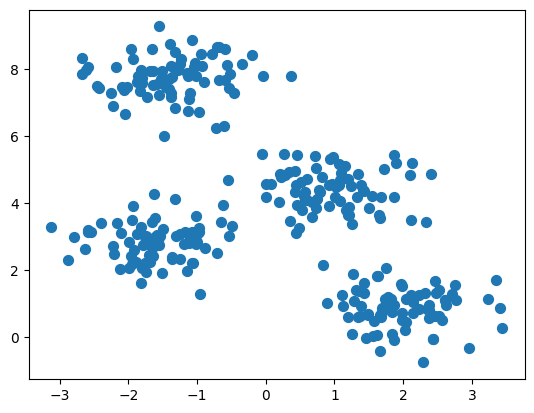

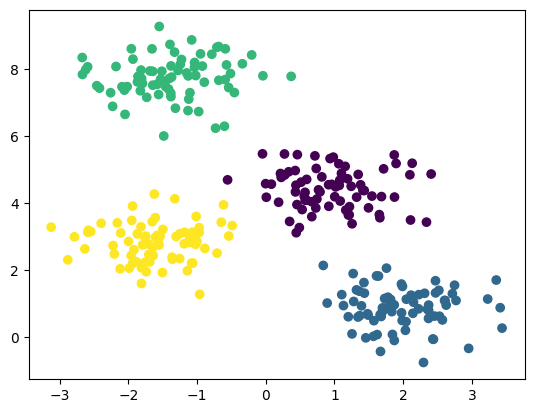

In [ ]:
# K-Means Clustering Program
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.60)

# Plot the generated data
plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

# Fit the KMeans model to the data
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Predict the cluster labels
y_pred = kmeans.predict(X)

# Plot the resulting clusters
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='viridis')
plt.show()


In [ ]:
pip install kneed

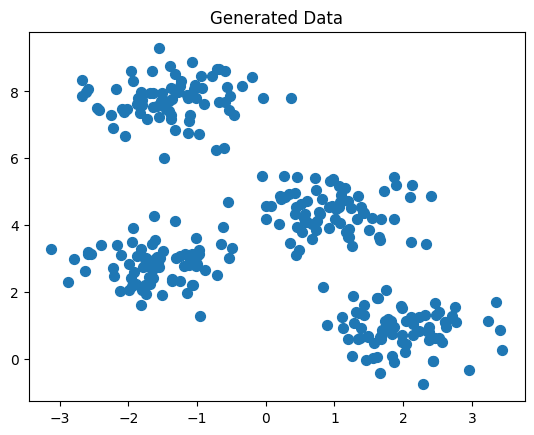

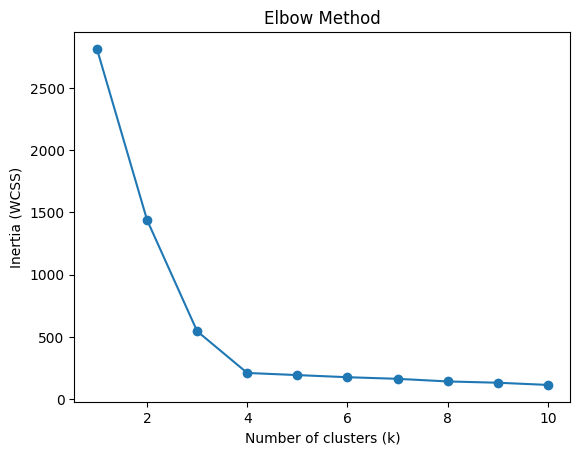

Optimal number of clusters detected: 4


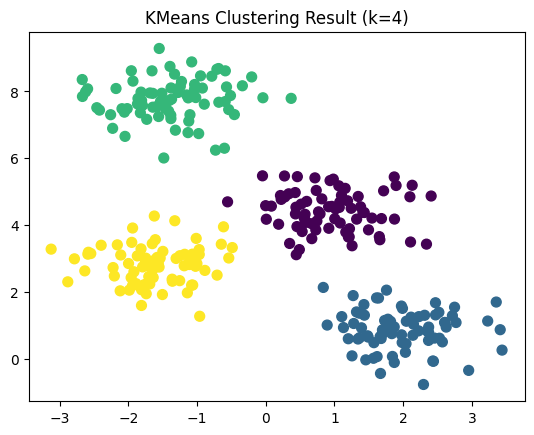

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from kneed import KneeLocator

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Data")
plt.show()

inertia_values = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.show()

knee = KneeLocator(k_range, inertia_values, curve='convex', direction='decreasing')
optimal_k = knee.knee
print(f"Optimal number of clusters detected: {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50)
plt.title(f"KMeans Clustering Result (k={optimal_k})")
plt.show()


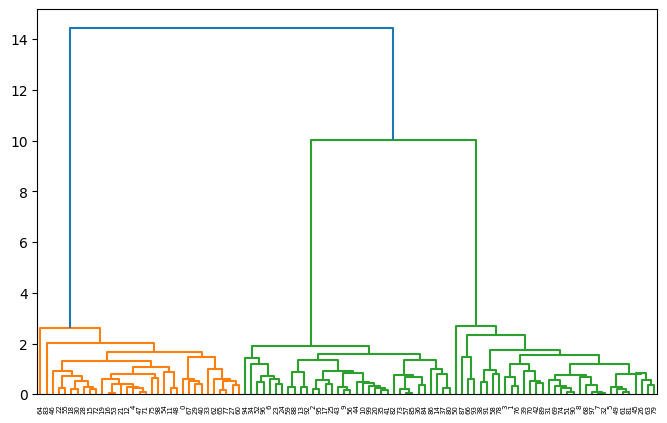

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

X, _ = make_blobs(n_samples=100, centers=3, random_state=42, cluster_std=1.0)

single = AgglomerativeClustering(n_clusters=3, linkage='single')
y_single = single.fit_predict(X)

complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
y_complete = complete.fit_predict(X)

average = AgglomerativeClustering(n_clusters=3, linkage='average')
y_average = average.fit_predict(X)

ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_ward = ward.fit_predict(X)

Z = linkage(X, method='centroid')
labels_centroid = fcluster(Z, t=3, criterion='maxclust')

plt.figure(figsize=(8,5))
dendrogram(Z)
plt.show()


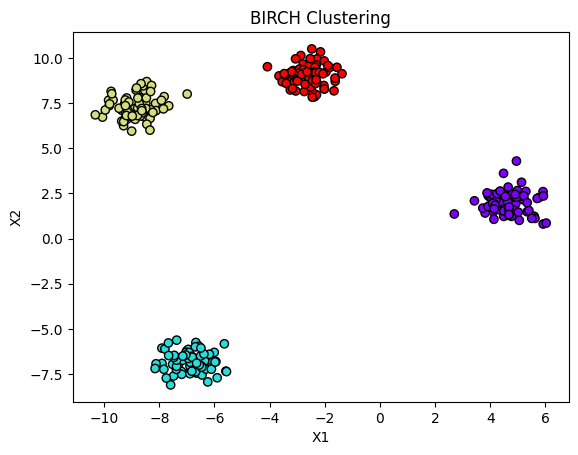

In [ ]:
# BIRCH Clustering Example
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch
import matplotlib.pyplot as plt

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Apply BIRCH
birch_model = Birch(n_clusters=4)
y_birch = birch_model.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=y_birch, cmap='rainbow', edgecolor='k')
plt.title("BIRCH Clustering")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


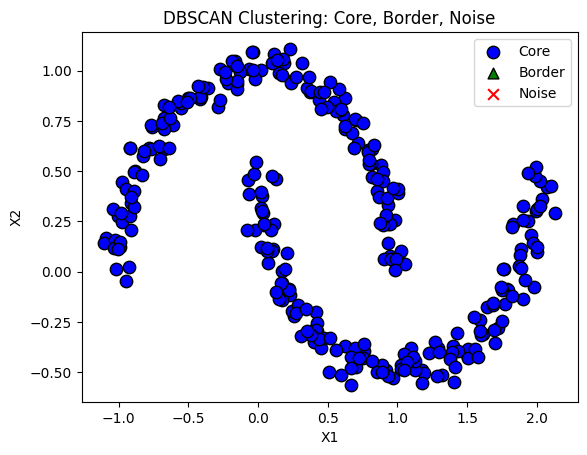

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
y = dbscan.fit_predict(X)

# Identify core samples, border samples, and noise
core_samples_mask = np.zeros_like(y, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Plot core points
plt.scatter(X[core_samples_mask, 0], X[core_samples_mask, 1],
            c='blue', marker='o', edgecolor='k', s=80, label='Core')

# Plot border points
border_mask = (y != -1) & (~core_samples_mask)
plt.scatter(X[border_mask, 0], X[border_mask, 1],
            c='green', marker='^', edgecolor='k', s=60, label='Border')

# Plot noise points
noise_mask = (y == -1)
plt.scatter(X[noise_mask, 0], X[noise_mask, 1],
            c='red', marker='x', s=60, label='Noise')

plt.title("DBSCAN Clustering: Core, Border, Noise")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()
